# ISLR- Python Ch4 Applied 10

- [Load Dataset](#Load-Datasets)
- [A. Numerical and Graphical Summary of Data](#A.-Numerical-and-Graphical-Summary-of-Data)
- [B. Logistic Regression of Market Direction](#B.-Logistic-Regression-of-Market-Direction)
- [C. Examine Confusion Matrix](#C.-Examine-Confusion-Matrix)
- [D. Split Data and Re-Examine](#D.-Split-Data-and-Re-Examine)
- [E. Linear Discriminant Aanlysis of Market Direction](#E.-Linear-Discriminant-Analysis-of-Market-Direction)
- [F. Quadratic Discriminant Analysis of Market Direction](#F.-Quadratic-Discriminant-Analysis-of-Market-Direction)
- [G. K-Nearest Neighbors Analysis of Market Direction](#G.-K-Nearest-Neighbors-Analysis-of-Market-Direction)
- [H-I. Experiment with Predictors](#H-I.-Experiment-with-Predictors)

In [11]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from scipy import stats

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

## Load Weekly Dataset

In [2]:
df = pd.read_csv('../../../data/Weekly.csv')
print('Weekly dataframe shape =', df.shape)
df.head()

Weekly dataframe shape = (1089, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


## A. Numerical and Graphical Summary of Data

We are interested in the relationship between each of the predictors (lags and volume) with the market direction. We can get an idea if any of these predictors are correlated with the response by looking at the correlation matrix.

In [3]:
# Compute correlation coeffecient matrix
correlations = df.corr(method='pearson')
print(correlations)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


As with the Smarket data, the strongest correlation is between year and volume. The Today's return value is weakly correlated with lag1, lag2 and lag3. Lets make a few plots.

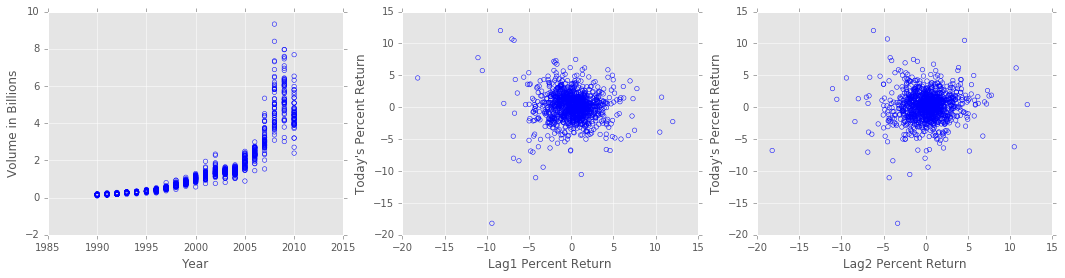

In [4]:
# Plot the Trading Volume vs. Year
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4));

ax1.scatter(df.Year.values,df.Volume.values, facecolors='none', edgecolors='b');
ax1.set_xlabel('Year');
ax1.set_ylabel('Volume in Billions');

# Plot Lag1 vs Today's return
ax2.scatter(df.Lag1.values, df.Today.values, facecolors='none', edgecolors='b' );
ax2.set_xlabel('Lag1 Percent Return');
ax2.set_ylabel('Today\'s Percent Return');

# Plot Lag1 vs Today's return
ax3.scatter(df.Lag2.values, df.Today.values, facecolors='none', edgecolors='b' );
ax3.set_xlabel('Lag2 Percent Return');
ax3.set_ylabel('Today\'s Percent Return');


As expected given the correlation matrix, there is a strong relationship between year and trading volume (stock market volume increases over time) and a very weak relationship (not visible graphically) between Today's percentage return and the previous days returns (i.e. the lags). We should not expect our models to perform exceedingly well because the is little relationship between the predictors and response.

## B. Logistic Regression of Market Direction

We will now build a logistic regression model for the market direction using the entire dataset using all the lags and volume to attempt to predict the direction response variable.

In [5]:
# Construct Design Matrix #
###########################
predictors = df.columns[1:7] # the lags and volume
X = sm.add_constant(df[predictors])

# Convert the Direction to Binary #
###################################
y = np.array([1 if el=='Up' else 0 for el in df.Direction.values])

# Construct the logit model #
###########################
logit = sm.Logit(y,X)
results=logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 16 Jul 2016   Pseudo R-squ.:                0.006580
Time:                        11:12:08   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002         0.098     0.435
Lag1          -0.0413      0.

Only the Lag2 variable of the predictors is significant at an alpha confidence level of 0.05. The predictors that have the lowest p-values are Lag1 and Lag2. A model based on these two variables would be reasonable to attempt.

In [6]:
# Get the predicted results for the full dataset
y_predicted = results.predict(X)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down   Up
Down    54   48
Up     430  557


Error Rate = 0.438934802571


PRECISION: On days when the model predicts the market to increase, the probability the market does increase is 557/(430+557) of 56%. 

TYPE I ERROR: (AKA false-positive), the probability that we have predicted the market to increase and it does not increase is 430/(430+54) = 89%

TYPE II ERROR: This is the number of false negatives to all positives. It is 48/(557+48)= 8%

The sensitivity is therefore 92%. The model is very sensitive to catching all true positives, but this incurs a high false positive rate. This is the inverse relationship between Type I and Type II errors.

## D. Split Data and Re-Examine

We are now going to split the data into a training set and a testing set and refit a logistic model using Lag2 as the only predictor. The training data will be the data from the years 1990 through 2008 and the testing data will be from 2009 through 2010.

In [7]:
# Split Data #
##############
# get the Lag2 values for years less than =  2008
X_train = sm.add_constant(df[df.Year <= 2008].Lag2)
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008].Lag2)
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Jul 2016   Pseudo R-squ.:                0.003076
Time:                        11:12:08   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002         0.077     0.329
Lag2           0.0581      0.

The model correctly predicts (56+9)/104 = 62.5% of the market directions. We still have high number of Type I errors and low number of Type II errors as with the model with Lag1, Lag2 and volume as predictors. Notice that the p-value of the lag2 coeffecient increased without Lag1 and Volume present.

## E. Linear Discriminant Analysis of Market Direction

We will now try to predict market direction by maiximing the Linear Discriminant function. The LDA module in sklearn will estimate the priors, the vector of class means, and the variance (remember the variance is assumed to be the same for all classes in LDA). Our classes are 'Up' and 'Down', the priors are P('Up') and P('Down') and the means are $\mu_{Up}$ and $\mu_{Down}$.

In [8]:
# Create LDA Classifier and Fit #
#################################
clf = LDA(solver='lsqr', store_covariance=True)
# No constant needed for LDA so reset the X_train
X_train = df[df.Year <= 2008].Lag2.values
# reshape so indexed by two indices
X_train = X_train.reshape((len(X_train),1))

# also go ahead and get test set and responses
X_test = df[df.Year > 2008].Lag2.values
# reshape into so indexed by two indices
X_test = X_test.reshape((len(X_test),1))

clf.fit(X_train, y_train)
print('Priors = ', clf.priors_ )
print('Class Means = ', clf.means_[0], clf.means_[1])
print('Coeffecients = ', clf.coef_)
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = clf.predict(X_test)
#conver the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Priors =  [ 0.4477  0.5523]
Class Means =  [-0.0357] [ 0.2604]
Coeffecients =  [[ 0.0578]]


CONFUSION MATRIX
      Down  Up
Down     9   5
Up      34  56


Error Rate = 0.375


The results of the LDA model are exactly the same as the regression model.

## F. Quadratic Discriminant Analysis of Market Direction 

Now we will use quadratic discriminant analysis on the weekly returns data set. QDA does not assume that all the classes have the same variance and hence their is a quadratic term in the maximization of the density function P(X=x|y=k). Again, sklearn will estimate the class priors, means, and variances and compute the class that maximizes the conditional probability P(y=k|X=x).

In [10]:
# Build Classifier and Fit #
############################
qclf = QDA(store_covariances=True)
qclf.fit(X_train,y_train)

print('Priors = ', qclf.priors_ )
print('Class Means = ', qclf.means_[0], qclf.means_[1])
print('Covariances = ', qclf.covariances_)
print('\n')

# Predict Test Set Responses #
##############################
y_predict = qclf.predict(X_test)
#conver the predicted probabilities to class 0 or 1
y_predicted= np.array(y_predict > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predict, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Priors =  [ 0.4477  0.5523]
Class Means =  [-0.0357] [ 0.2604]
Covariances =  [array([[ 4.8378]]), array([[ 5.3707]])]


CONFUSION MATRIX
      Down  Up
Down     0   0
Up      43  61


Error Rate = 0.413461538462


For a quadratic decision boundary we need to have multiple predictors with different correlation for each class. Here we have a single predictor so the boundary cannot be quadratic. Thus the model perfoms poorly.

## G. K-Nearest Neighbors Analysis of Market Direction

In [16]:
# Build KNN Classifier and Fit #
################################
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

# Predict Test Set Responses #
##############################
y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down  Up
Down    21  31
Up      22  30

Error Rate = 0.509615384615


Using only 1 Nearest Neighbor, the model performs at chance level.

In [30]:
# Build KNN Classifier and Fit #
################################
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)

# Predict Test Set Responses #
##############################
y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down  Up
Down    23  22
Up      20  39

Error Rate = 0.403846153846


## H-I. Experiment with Predictors

By varying the k-value, we can empiraically find the minimum test error rate. This occurs at ~ 20 nearest neighbors (see results above). The error rate (40 %) is still higher than in the logistic or LDA models. They perform best on this data set. 

**Model with Lag1, Lag2 and Lag3**

It is unlikely that we can make much improvement on the model by adding more uncorrelated variables to the model. Below, I first tried adding Lag3, the predictor with the next lowest p-value. The error rate increases on the test data.

** Model with Lag1 x Lag2 Interaction **

The Lag2 variable in the full logistic model was the only variable with a significant coeffecient. The next most significant term was Lag1. We will build a model with both of these predictors and include an interaction term. We have very little motivation for this because the plots of Lag1 and Lag2 vs today's return do not indicate any strong relationships. 

### Model with Three Lags

In [45]:
# Split Data #
##############
predictors = df.columns[1:4]
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683687
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Jul 2016   Pseudo R-squ.:                0.005792
Time:                        13:27:15   Log-Likelihood:                -673.43
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04928
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2123      0.065      3.282      0.001         0.086     0.339
Lag1          -0.0537      0.

### Model with Two Lags and Interaction

In [48]:
# Add Interaction #
###################
# add the interaction term to the dataframe
df['Lag1xLag2'] = pd.Series(df.Lag1*df.Lag2, index=df.index)
predictors = ['Lag1', 'Lag2', 'Lag1xLag2']

# Split Data #
##############
X_train = sm.add_constant(df[df.Year <= 2008][predictors])
response_train = df[df.Year <= 2008].Direction
# convert responses to 0,1's
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

# for the test set use the years > 2008
X_test = sm.add_constant(df[df.Year > 2008][predictors])
response_test = df[df.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

# Construct Classifier and Fit #
################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

# Predict Test Set Responses #
##############################
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

# Build Confusion Matrix #
##########################
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Jul 2016   Pseudo R-squ.:                0.005772
Time:                        13:39:28   Log-Likelihood:                -673.45
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04990
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2114      0.065      3.273      0.001         0.085     0.338
Lag1          -0.0515      0.

Again we are finding no improvement, the best model is the logistic or LDA model. In these models we used only the significant Lag2 variable and achieved and error rate ~33%. 